## Importing Relevant Libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
import matplotlib.pyplot as plt
%matplotlib inline

## Importing datasets

In [2]:
train=pd.read_csv("train.csv")
test=pd.read_csv("test.csv")

## Combining the two datasets

In [3]:
data=pd.concat([train,test],ignore_index=True)
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1307,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


## Checking for both missing and unique values

In [4]:
data.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

In [5]:
data.nunique()

PassengerId    1309
Survived          2
Pclass            3
Name           1307
Sex               2
Age              98
SibSp             7
Parch             8
Ticket          929
Fare            281
Cabin           186
Embarked          3
dtype: int64

## Replacing the missing values with mode

In [6]:
data['Age'].fillna(data['Age'].mode()[0],inplace=True)
data['Survived'].fillna(data['Survived'].mode()[0],inplace=True)
data['Fare'].fillna(data['Fare'].mode()[0],inplace=True)
data['Cabin'].fillna(data['Cabin'].mode()[0],inplace=True)
data['Embarked'].fillna(data['Embarked'].mode()[0],inplace=True)

In [7]:
data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

## Realization of five number of summary

In [8]:
largest_value=data["Fare"].max()
smallest_value=data["Fare"].min()
Q1=data["Fare"].quantile(0.25)
Q2=data["Fare"].quantile(0.50)
Q3=data["Fare"].quantile(0.75)

## Removing the outliers

### Detection of outliers boxplot

<AxesSubplot:>

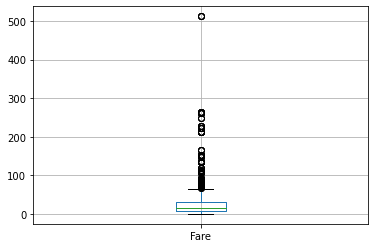

In [9]:
data.boxplot("Fare")

### Replacing the data points that lie outside of the lower and the upper bounds with NULL values (nan)

In [10]:
#np.percentile() is used to calculate the Q1 and Q3. Further, we replace the outliers with NULL values using function np.nan

for x in ["Fare"]:
    Q3,Q1=np.percentile(data.loc[:,x],[75,25])
    interquartile_range=Q3-Q1
    
    max=Q3+(1.5*interquartile_range)
    min=Q1-(1.5*interquartile_range)
    
    data.loc[data[x]<min,x]=np.nan
    data.loc[data[x]>max,x]=np.nan

### we check for misssing values after replacing the outliers

In [11]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare           171
Cabin            0
Embarked         0
dtype: int64

### we drop the NULL values

In [12]:
data=data.dropna(axis=0)

In [13]:
data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

## Coding categorical variables as numerical variables

In [14]:
le=LabelEncoder()
data['Sex']=le.fit_transform(data['Sex'])

C:\Users\Boss\AppData\Local\Temp/ipykernel_10492/3839898235.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Sex']=le.fit_transform(data['Sex'])


### Creating dummies for the variable

In [15]:
dummy=pd.get_dummies(data['Sex'])
dummy

,0,1
0,0,1
2,1,0
3,1,0
4,0,1
5,0,1
...,...,...
1303,1,0
1304,0,1
1306,0,1
1307,0,1


In [16]:
dummy2=pd.get_dummies(data,columns=["Sex","Embarked"])
dummy2.dtypes

PassengerId      int64
Survived       float64
Pclass           int64
Name            object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Sex_0            uint8
Sex_1            uint8
Embarked_C       uint8
Embarked_Q       uint8
Embarked_S       uint8
dtype: object

## Training Data

In [17]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [18]:
test.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [19]:
train['Age'].fillna(train['Age'].mode()[0],inplace=True)
test['Parch'].fillna(test['Parch'].mode()[0],inplace=True)
train['Parch'].fillna(train['Parch'].mode()[0],inplace=True)
train['Fare'].fillna(train['Fare'].mode()[0],inplace=True)
test['Age'].fillna(test['Age'].mode()[0],inplace=True)
test['Fare'].fillna(test['Fare'].mode()[0],inplace=True)

In [20]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [21]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
dtype: int64

In [22]:
x_train=train[["Age","Parch"]]
y_train=train["Fare"]

In [23]:
x_test=test[["Age","Parch"]]
y_test=test["Fare"]

In [24]:
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

## Creating a train and test split

In [25]:
xtrain,xtest,ytrain,ytest=train_test_split(x_train,y_train,test_size=0.3,random_state=42)

## Fitting linear regression to the dataset

In [26]:
lin=LinearRegression()
lin.fit(xtrain,ytrain)

LinearRegression()

## obtaining the coefficient and intercept

In [27]:
lin.coef_

array([ 0.55624112, 14.63051469])

In [28]:
lin.intercept_

10.489449840170217

## predicting the test set of the training data

In [29]:
prediction=lin.predict(xtest)
prediction

array([ 38.46975144,  27.7329246 ,  21.61427227,  28.45741126,
        18.27682554,  24.951719  ,  23.83923675,  19.38930778,
        19.38930778,  50.31906053,  31.07037133,  34.96405918,
        38.46975144,  27.17668348,  30.51413021,  34.01982247,
        33.85157694,  23.83923675,  25.50796012,  36.63278255,
        23.83923675,  29.40164797,  21.05803115,  21.61427227,
        23.83923675,  45.31289043,  32.7390947 ,  27.7329246 ,
        41.97544371,  27.7329246 ,  21.05803115,  22.72675451,
        23.83923675,  23.83923675,  20.50179003,  25.50796012,
        26.06420124,  23.83923675,  27.17668348,  23.83923675,
        22.17051339,  26.62044236,  23.83923675,  23.83923675,
        50.15081499,  63.28085185,  21.05803115,  23.28299563,
        23.83923675,  72.01246426,  27.90117014,  54.04450284,
        91.26115346,  45.86913156,  46.64512273,  49.76281941,
        28.28916572,  52.9320206 ,  29.95788909,  21.05803115,
        22.17051339,  32.35109911,  26.06420124,  23.83

## Obtaining the RMSE for the model

In [30]:
import math

In [31]:
rmse=math.sqrt(mean_squared_error(ytest,prediction))
rmse

44.63260755809465

## Prediction e.g predicting sales for each product at a particular store in the test data

In [32]:
y_sales_prediction=lin.predict(x_test)
y_sales_prediction

array([ 29.67976853,  36.63278255,  44.97639937,  25.50796012,
        37.3572692 ,  18.27682554,  27.17668348,  39.58223369,
        20.50179003,  22.17051339,  22.17051339,  36.07654142,
        23.28299563,  45.53264049,  36.63278255,  23.83923675,
        29.95788909,  22.17051339,  25.50796012,  35.5203003 ,
        41.08271152,  30.12613462,  22.17051339,  36.80102808,
        81.08056774,  38.30150591,  37.3572692 ,  23.00487507,
        33.29533582,  22.17051339,  38.30150591,  23.83923675,
        58.10643623,  51.43154277,  27.17668348,  20.77991059,
        22.17051339,  22.17051339,  24.39547788,  22.17051339,
        46.81336826,  22.17051339,  33.29533582,  27.17668348,
        35.5203003 ,  24.39547788,  35.5203003 ,  22.17051339,
        43.86391712,  59.77515959,  23.83923675,  25.50796012,
        36.24478696,  55.32523062,  22.17051339,  30.68237574,
        29.95788909,  24.39547788,  22.17051339,  30.51413021,
        19.9455489 ,  28.28916572,  20.50179003,  22.72